In [50]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:¶
There are many ways you can read the MNIST data. Here is a way to read all the information.

In [51]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = ''

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='Blues')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


Train image 54575-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  44 118 200 254 255 251
  131  30   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [52]:
#np.shape(test_images)

In [53]:
#np.shape(train_images)

In [54]:
import idx2numpy
import pandas as pd
import random

In [55]:
#reading the MNIST data set
#train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
#train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

#test_images = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
#test_labels = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")

In [56]:
#flatting the train_images
train_images_flatten = np.reshape(train_images,(60000,28*28)).astype(np.float64)
train_images_flatten
#train_images_flatten.shape
#test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
#print(train_labels)

In [58]:
#train_labels_flatten = np.reshape(train_labels,(60000,))
#train_labels_flatten

In [59]:
import random

In [60]:
shuffle_number = random.sample(range(0,60000),60000)
#shuffle_number

# Extract 20% data from thhe training data as a validation set.Please do not use some standard function from scikit-learn or others!

In [61]:
# Your validation set extraction script/code 
train_datas = train_images_flatten[shuffle_number[0:48000]]

train_labels_datas = train_labels[shuffle_number[0:48000]]

validation_datas = train_images_flatten[shuffle_number[48000:60000]]

validation_labels_datas = train_labels[shuffle_number[48000:60000]]

In [62]:
#print(train_labels_datas)
#print(train_labels_datas)

In [63]:
label = (train_labels_datas == 0) |(train_labels_datas ==1) |(train_labels_datas ==2) |(train_labels_datas == 3)|(train_labels_datas ==4)|(train_labels_datas == 5)|(train_labels_datas == 6)|(train_labels_datas==7)|(train_labels_datas==8)|(train_labels_datas == 9)

arr1 = train_datas

arr2 = train_labels_datas

#print(arr1)

#np.shape(arr1)

#np.shape(arr2)

#print(label)

#print(arr1)

In [64]:
import collections
#c = collections.Counter(train_labels_datas)
#c

In [65]:
#e=dict(c)

#sorted(e.items())

#e=collections.OrderedDict(sorted(e.items()))
#print(e)

#df=pd.DataFrame(e.values(),e.keys())

#df.columns=['Frequency count']
#df

# Implement k-NN classification rule/algorithm, we have discussed in our class.Please do not use some standard function from scikit-learn or others!

# Manhattan or Cityblock Distance

In [43]:
# Your k-NN algorithm script/code 

class KNNp:
    
    

    def __init__(self,K):
        self.K=K
        
    def p_root(value, root): 
        root_value = 1 / float(root)
        return round (value** root_value, 3)

    
        
    def fit(self,X,Y):
        self.X_train = X
        self.Y_train = Y
        
    def predict(self,X_test):
        from collections import Counter
        final_output = []
        for i in range(len(X_test)):
            d=[]
            middle = []
            for j in range(len(self.X_train)):
                distance=np.sum(np.abs(self.X_train[j]-X_test[i]))
                d.append([distance,j])
            d.sort()
            d = d[0:self.K]
            for d,j in d:
                middle.append(self.Y_train[j])
            answer=Counter(middle).most_common(1)[0][0]
            final_output.append(answer)
                
        return final_output
    


In [44]:
label1 = (validation_labels_datas == 0) |(validation_labels_datas ==1) |(validation_labels_datas ==2) |(validation_labels_datas == 3)|(validation_labels_datas ==4)|(validation_labels_datas == 5)|(validation_labels_datas == 6)|(validation_labels_datas==7)|(validation_labels_datas==8)|(validation_labels_datas == 9)
#label1

In [45]:
import time

In [21]:
accuracy_list1 =[]
p_value = 1
for i in range (1,26,2):
    start=time.time()    
    K_nbd = KNNp(i)
    
    knn = K_nbd.fit(arr1,arr2)
    
    X_valid_test=validation_datas
    
    
    Y_valid_true=validation_labels_datas[label1]
    
    Y_valid_pred=K_nbd.predict(X_valid_test)

        
    accuracy_list1.append(((len(Y_valid_true[(Y_valid_true == Y_valid_pred)])/len(Y_valid_pred))*100))
    elapsed_time = (time.time()-start)
    
    print("time taken for i={} is {}".format(i,elapsed_time))
    print("Accuracy for k={} is {}".format(i,accuracy_list1[(i-1)//2]))
    
print(accuracy_list1)

time taken for i=1 is 4033.672618627548
Accuracy for k=1 is 96.56666666666666
time taken for i=3 is 4024.3499155044556
Accuracy for k=3 is 96.71666666666667
time taken for i=5 is 4024.5466923713684
Accuracy for k=5 is 96.61666666666666
time taken for i=7 is 4024.112263441086
Accuracy for k=7 is 96.54166666666667
time taken for i=9 is 4029.4846165180206
Accuracy for k=9 is 96.40833333333333
time taken for i=11 is 4030.827185153961
Accuracy for k=11 is 96.125
time taken for i=13 is 4031.7386441230774
Accuracy for k=13 is 95.86666666666666
time taken for i=15 is 4018.5444118976593
Accuracy for k=15 is 95.75
time taken for i=17 is 4024.8503794670105
Accuracy for k=17 is 95.58333333333333
time taken for i=19 is 4035.3062796592712
Accuracy for k=19 is 95.35
time taken for i=21 is 4019.3753383159637
Accuracy for k=21 is 95.275
time taken for i=23 is 4022.3330206871033
Accuracy for k=23 is 95.10833333333333
time taken for i=25 is 4042.4805450439453
Accuracy for k=25 is 94.99166666666666
[96.56

In [22]:
import pandas as pd

In [23]:
K_val=list(range(1,26,2))
df3=pd.DataFrame(list(zip(K_val,accuracy_list1)),columns=['K_value','Accuracy(%)'])
df3

K_value  Accuracy(%)
0         1    96.566667
1         3    96.716667
2         5    96.616667
3         7    96.541667
4         9    96.408333
5        11    96.125000
6        13    95.866667
7        15    95.750000
8        17    95.583333
9        19    95.350000
10       21    95.275000
11       23    95.108333
12       25    94.991667

In [24]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

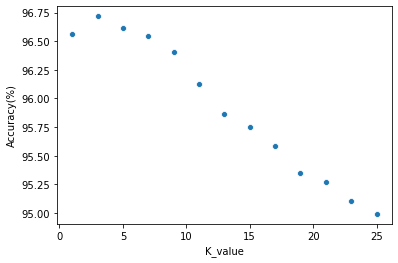

In [50]:
sns.scatterplot(data = df3,x = "K_value",y = "Accuracy(%)")
plt.show()

<AxesSubplot:title={'center':'K_value vs Accuracy(%)'}, xlabel='K_value'>

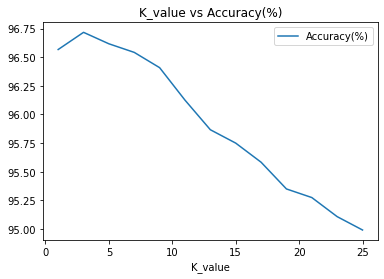

In [35]:
df3.plot(x='K_value',y='Accuracy(%)',title='K_value vs Accuracy(%)')

In [42]:
print(df3['Accuracy(%)'].max())

96.71666666666667


In [43]:
index=df3['Accuracy(%)'].idxmax()
k= df3['K_value'][index]

# CONFUSION MATRIX

In [ ]:
pd.crosstab(np.array(Y_valid_true), np.array(Y_valid_pred))

# Test Data

In [67]:
import random
random_number = random.sample(range(0,10000),10000)
random_number

[9300,
 936,
 2035,
 4133,
 3505,
 8615,
 702,
 7945,
 560,
 2150,
 7370,
 7141,
 5944,
 1902,
 2126,
 2551,
 7762,
 3224,
 1494,
 2630,
 8687,
 8518,
 3927,
 5306,
 9844,
 8240,
 9782,
 3720,
 5526,
 7873,
 1996,
 9409,
 1573,
 6124,
 407,
 2663,
 4697,
 1311,
 6301,
 682,
 3359,
 1529,
 6759,
 7327,
 6320,
 2266,
 6743,
 2058,
 7594,
 3124,
 7639,
 6784,
 938,
 2159,
 6085,
 8059,
 5371,
 4394,
 8341,
 4820,
 8217,
 6866,
 4198,
 4056,
 8720,
 4276,
 5476,
 8025,
 8695,
 7614,
 8187,
 5962,
 8665,
 8218,
 3521,
 2301,
 1116,
 3811,
 6136,
 2971,
 5479,
 7729,
 4952,
 2351,
 8985,
 2658,
 6478,
 8373,
 9510,
 2289,
 9766,
 4551,
 3883,
 9770,
 7903,
 6333,
 7961,
 5353,
 7805,
 563,
 1243,
 6997,
 4821,
 774,
 623,
 7355,
 2098,
 2809,
 9971,
 674,
 9734,
 2074,
 5057,
 1627,
 5583,
 8953,
 4169,
 5341,
 8970,
 9859,
 7015,
 2886,
 8657,
 2646,
 1775,
 6089,
 4510,
 2468,
 1749,
 7187,
 3007,
 1990,
 3905,
 5556,
 3392,
 3585,
 9670,
 1842,
 4112,
 6632,
 7158,
 5284,
 685,
 9205,
 28

In [68]:
test_images_flatten = np.reshape(test_images,(10000,28*28))
test_images_flatten
test_datas = test_images_flatten[random_number[0:10000]]
test_datas

test_labels_flatten = np.reshape(test_labels,(10000,))
test_labels_flatten
test_labels_datas = test_labels_flatten[random_number[0:10000]]
test_labels_datas

array([7, 8, 5, ..., 2, 9, 5], dtype=uint8)

# ACCURACY OF TEST_DATA FOR BEST K = 2

In [56]:
K_nbd=KNNp(k)
knn=K_nbd.fit(arr1,arr2)
X_valid_test=test_datas
Y_valid_true=test_labels_datas
Y_valid_pred=K_nbd.predict(X_valid_test)
print(((len(Y_valid_true[(Y_valid_true ==Y_valid_pred)]))/len(Y_valid_pred))*100)

96.17999999999999


# Euclidean Distance

In [69]:
import time

In [70]:
class KNNp:
    
    

    def __init__(self,K):
        self.K=K
        
    def p_root(value, root): 
        root_value = 1 / float(root)
        return round (value** root_value, 3)

    
        
    def fit(self,X,Y):
        self.X_train = X
        self.Y_train = Y
        
    def predict(self,X_test):
        from collections import Counter
        final_output = []
        for i in range(len(X_test)):
            d=[]
            middle = []
            for j in range(len(self.X_train)):
                distance=np.sum((np.array(self.X_train[j])-np.array(X_test[i]))**2)**(1/2)
                d.append([distance,j])
            d.sort()
            d = d[0:self.K]
            for d,j in d:
                middle.append(self.Y_train[j])
                
            answer=Counter(middle).most_common(1)[0][0]
            final_output.append(answer)
                
        return final_output


In [71]:

#arr1 = train_datas

#arr2 = train_labels_datas

In [72]:
accuracy_list2 =[]
p_value = 2
for i in range (1,26,2):
    start=time.time()    
    K_nbd = KNNp(i)
    
    knn = K_nbd.fit(arr1,arr2)
    
    X_valid_test=validation_datas
    
    
    Y_valid_true=validation_labels_datas
    
    Y_valid_pred=K_nbd.predict(X_valid_test)

        
    accuracy_list2.append(((len(Y_valid_true[(Y_valid_true == Y_valid_pred)])/len(Y_valid_pred))*100))
    elapsed_time = (time.time()-start)
    
    print("time taken for i={} is {}".format(i,elapsed_time))
    print("Accuracy for k={} is {}".format(i,accuracy_list2[(i-1)//2]))
    
print(accuracy_list2)

time taken for i=1 is 5033.147700309753
Accuracy for k=1 is 97.35000000000001
time taken for i=3 is 5031.847838401794
Accuracy for k=3 is 97.41666666666666
time taken for i=5 is 5033.866987466812
Accuracy for k=5 is 97.25833333333334
time taken for i=7 is 5051.661639928818
Accuracy for k=7 is 97.13333333333334
time taken for i=9 is 5042.726898431778
Accuracy for k=9 is 97.05
time taken for i=11 is 5026.871382951736
Accuracy for k=11 is 96.93333333333334
time taken for i=13 is 5048.824597835541
Accuracy for k=13 is 96.76666666666667
time taken for i=15 is 5082.654111623764
Accuracy for k=15 is 96.55
time taken for i=17 is 5077.892354488373
Accuracy for k=17 is 96.42500000000001
time taken for i=19 is 5057.339148283005
Accuracy for k=19 is 96.375
time taken for i=21 is 5078.373001813889
Accuracy for k=21 is 96.22500000000001
time taken for i=23 is 5067.0954756736755
Accuracy for k=23 is 96.125
time taken for i=25 is 5102.163044214249
Accuracy for k=25 is 95.99166666666666
[97.35000000000

# confusion matrix

In [73]:
pd.crosstab(np.array(Y_valid_true),  np.array(Y_valid_pred))

col_0     0     1     2     3     4     5     6     7     8     9
row_0                                                            
0      1193     1     0     0     0     1     5     0     0     1
1         0  1321     3     0     1     0     1     1     1     0
2        15    23  1120     7     1     1     3    27     3     5
3         1     8     6  1137     1    10     1    14     5    10
4         1    19     1     1  1041     0     3     1     1    29
5         4     6     1     7     4  1023     9     0     2     7
6         8     4     0     0     1     5  1197     0     0     0
7         1    24     3     1     1     0     0  1261     0    19
8         3    21     2    12     5    24     9     5  1056    19
9         7     6     1    12     8     4     0    22     2  1170

In [74]:
K_val=list(range(1,26,2))
df4=pd.DataFrame(list(zip(K_val,accuracy_list2)),columns=['K_value','Accuracy(%)'])
df4

K_value  Accuracy(%)
0         1    97.350000
1         3    97.416667
2         5    97.258333
3         7    97.133333
4         9    97.050000
5        11    96.933333
6        13    96.766667
7        15    96.550000
8        17    96.425000
9        19    96.375000
10       21    96.225000
11       23    96.125000
12       25    95.991667

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='K_value', ylabel='Accuracy(%)'>

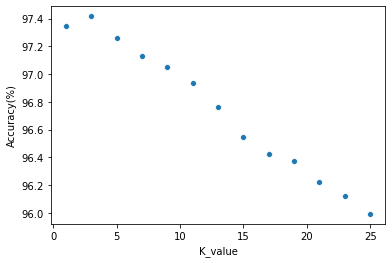

In [76]:
sns.scatterplot(data = df4,x = "K_value",y = "Accuracy(%)")

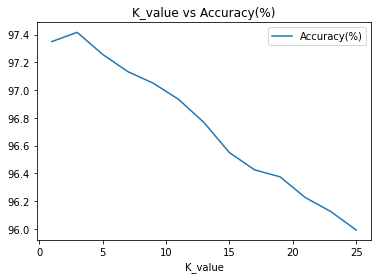

In [77]:
df4.plot(x='K_value',y='Accuracy(%)',title='K_value vs Accuracy(%)')
plt.show()

In [78]:
index=df4['Accuracy(%)'].idxmax()
k= df4['K_value'][index]
print(k)

3


# Test Data

In [79]:
#import random
#random_number = random.sample(range(0,10000),10000)
#random_number

In [80]:
test_images = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")

In [81]:
test_images_flatten = np.reshape(test_images,(10000,28*28))
test_images_flatten
test_datas = test_images_flatten[random_number[0:10000]]
test_datas

test_labels_flatten = np.reshape(test_labels,(10000,))
test_labels_flatten
test_labels_datas = test_labels_flatten[random_number[0:10000]]
test_labels_datas

array([7, 8, 5, ..., 2, 9, 5], dtype=uint8)

# ACCURACY OF TEST_DATA FOR BEST K =3

In [82]:
K_nbd=KNNp(k)
knn=K_nbd.fit(arr1,arr2)
X_valid_test=test_datas
Y_valid_true=test_labels_datas
Y_valid_pred=K_nbd.predict(X_valid_test)
print((len(Y_valid_true[(Y_valid_true ==Y_valid_pred)])/len(Y_valid_pred))*100)

96.85000000000001


# Chebychev distance¶

In [83]:
def chebychev_distance(x,y,p_value):
    if p_value == np.infty:
        return np.max(np.abs(x-y))

In [84]:
class KNNp:
    
    

    def __init__(self,K):
        self.K=K
        
    def chebychev_distance(x,y,p_value):
        if p_value == np.infty:
            return np.max(np.abs(x-y))  

    
        
    def fit(self,X,Y):
        self.X_train = X
        self.Y_train = Y
        
    def predict(self,X_test):
        from collections import Counter
        final_output = []
        for i in range(len(X_test)):
            d=[]
            middle = []
            for j in range(len(self.X_train)):
                distance=chebychev_distance(self.X_train[j],X_test[i],p_value)
                d.append([distance,j])
            d.sort()
            d = d[0:self.K]
            for d,j in d:
                middle.append(self.Y_train[j])
            answer=Counter(middle).most_common(1)[0][0]
            final_output.append(answer)
                
        return final_output


In [85]:
import time

In [86]:
accuracy_list3 =[]
p_value = np.infty
for i in range (1,26,2):
    start=time.time()
    K_nbd = KNNp(i)
    
    knn = K_nbd.fit(arr1,arr2)
    
    X_valid_test=validation_datas
    
    
    Y_valid_true=validation_labels_datas
    
    Y_valid_pred=K_nbd.predict(X_valid_test)

        
    accuracy_list3.append(((len(Y_valid_true[(Y_valid_true == Y_valid_pred)]))/len(Y_valid_pred))*100)
    elapsed_time = (time.time()-start)
    
    print("time taken for i={} is {}".format(i,elapsed_time))
    print("Accuracy for k={} is {}".format(i,accuracy_list3[(i-1)//2])) 
          
print(accuracy_list3)

time taken for i=1 is 3824.5505979061127
Accuracy for k=1 is 81.98333333333333
time taken for i=3 is 3814.8745934963226
Accuracy for k=3 is 82.08333333333333
time taken for i=5 is 3796.7965285778046
Accuracy for k=5 is 81.15833333333333
time taken for i=7 is 3788.5069925785065
Accuracy for k=7 is 80.80833333333334
time taken for i=9 is 3797.0857121944427
Accuracy for k=9 is 80.63333333333334
time taken for i=11 is 3766.011586666107
Accuracy for k=11 is 80.13333333333334
time taken for i=13 is 3759.9273343086243
Accuracy for k=13 is 79.60833333333333
time taken for i=15 is 3753.7170810699463
Accuracy for k=15 is 79.13333333333334
time taken for i=17 is 3771.410307407379
Accuracy for k=17 is 78.825
time taken for i=19 is 3753.4079394340515
Accuracy for k=19 is 78.24166666666666
time taken for i=21 is 3767.463157892227
Accuracy for k=21 is 77.91666666666667
time taken for i=23 is 3760.301434278488
Accuracy for k=23 is 77.875
time taken for i=25 is 3781.627206325531
Accuracy for k=25 is 77

In [89]:
K_val=list(range(1,26,2))
df5=pd.DataFrame(list(zip(K_val,accuracy_list3)),columns=['K_value','Accuracy(%)'])
df5

K_value  Accuracy(%)
0         1    81.983333
1         3    82.083333
2         5    81.158333
3         7    80.808333
4         9    80.633333
5        11    80.133333
6        13    79.608333
7        15    79.133333
8        17    78.825000
9        19    78.241667
10       21    77.916667
11       23    77.875000
12       25    77.925000

In [90]:
df5.plot(x='K_value',y='Accuracy(%)',title='K_value vs Accuracy(%)')

<AxesSubplot:title={'center':'K_value vs Accuracy(%)'}, xlabel='K_value'>

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='K_value', ylabel='Accuracy(%)'>

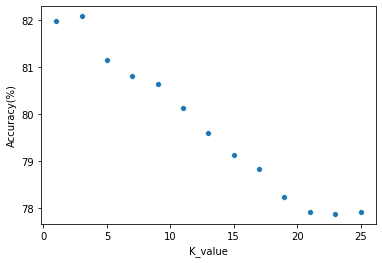

In [92]:
sns.scatterplot(data = df5,x = "K_value", y = "Accuracy(%)")

In [93]:
index=df5['Accuracy(%)'].idxmax()
k= df5['K_value'][index]
print(k)

3


# Confusion matrix¶

In [94]:
pd.crosstab(np.array(Y_valid_true),(np.array(Y_valid_pred)))

col_0     0     1    2    3    4    5     6     7    8     9
row_0                                                       
0      1098    11    6   23    2    0    24     7   21     9
1         1  1297    5    0    0    0     8     1   12     4
2        57    62  765   47   14    6    78    28  105    43
3        34    44   43  813    7   13    31    22  145    41
4        27    36   15   11  794   13    17    10   96    78
5        66    37   26  114   26  548    22    19  144    61
6        43    20   11    4   12    6  1063     7   40     9
7        22    19    9    9   13    9     6  1072   74    77
8        26    66   34   52   15   25    16    16  856    50
9        18    18    3   27   19    4     1    36   61  1045

# ACCURACY IN TEST DATA SET FOR BEST K

In [95]:
index=df5['Accuracy(%)'].idxmax()
k= df5['K_value'][index]

In [96]:
K_nbd=KNNp(k)
knn=K_nbd.fit(arr1,arr2)
X_valid_test=test_datas
Y_valid_true=test_labels_datas
Y_valid_pred=K_nbd.predict(X_valid_test)
print(((len(Y_valid_true[(Y_valid_true ==Y_valid_pred)]))/len(Y_valid_pred))*100)

81.03


# PLOTING 3D PICTURE

In [97]:
#accuracy_list3 come from chebychev distances 
print(accuracy_list3)

[81.98333333333333, 82.08333333333333, 81.15833333333333, 80.80833333333334, 80.63333333333334, 80.13333333333334, 79.60833333333333, 79.13333333333334, 78.825, 78.24166666666666, 77.91666666666667, 77.875, 77.925]


In [98]:
#print(accuracy_list1)

In [99]:
##accuracy list coming from city_block/Manhattan

accuracy_list1 = np.array([96.56666666666666,96.71666666666667,96.61666666666666,96.54166666666667,96.40833333333333,96.125,95.86666666666666,95.75,95.58333333333333,95.35,95.275,95.10833333333333,94.99166666666666])

In [100]:
print(accuracy_list1)

[96.56666667 96.71666667 96.61666667 96.54166667 96.40833333 96.125
 95.86666667 95.75       95.58333333 95.35       95.275      95.10833333
 94.99166667]


In [101]:
#accuracy_list2 come from Euclidian distances
accuracy_list2 = np.array([97.11666666666666,97.21666666666667,97.16666666666667,97.02499999999999,96.95833333333333,96.808333333333332,96.691666666666666,96.41666666666666,96.241666666666667,96.16666666666667,96.05,96.0083333333333,95.89999999999999])

In [102]:
#b = [int(k) for k in range(1,26,2)]*3
#print(b)

In [103]:
#X = ([1]*13) + ([2]*13) +([3]*13)
#print(X)

In [104]:

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection = "3d")
X = ([1]*13) + ([2]*13) +([3]*13) 
#y = [int(k) for k in range(1,26,2)]*3
Y = [int(k) for k in range(1,26,2)]*3
Z = []
Z.extend(accuracy_list1)
Z.extend(accuracy_list2)
Z.extend(accuracy_list3)
ax.scatter(X,Y,Z,'green')
ax.set_title('3D scatter plot for Accuracy , K-value & p value')
plt.show()

In [105]:
import matplotlib.pyplot as plt

In [106]:
list(np.array([1,2,3]))

[1, 2, 3]

In [107]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection = "3d")
x = np.array([[1]*13 , ([2]*13) , ([3]*13)]) 
b = [int(k) for k in range (1,26,2)]
y = np.array([b,b,b])
z = np.array([list(accuracy_list1),list(accuracy_list2),list(accuracy_list3)])
ax.plot_surface(x,y,z,cmap = 'RdYlGn',edgecolor = 'green')
ax.set_title('3D surface plot for Accuracy , K-value & p value')
plt.show()